## 1. LSTM 거꾸로 사용하기

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
max_features = 10000 # 특성 단어 수
maxlen = 500 # 사용할 텍스트 길이

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data('imdb.npz', num_words=max_features)

# reverse sequence
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

In [5]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) # add padding
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [6]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [7]:
history= model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 146s 7ms/step - loss: 0.5285 - acc: 0.7436 - val_loss: 0.3703 - val_acc: 0.8514
Epoch 2/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.3252 - acc: 0.8717 - val_loss: 0.4054 - val_acc: 0.8192
Epoch 3/10
20000/20000 [==============================] - 142s 7ms/step - loss: 0.2549 - acc: 0.9037 - val_loss: 0.3668 - val_acc: 0.8790
Epoch 4/10
20000/20000 [==============================] - 142s 7ms/step - loss: 0.2187 - acc: 0.9224 - val_loss: 0.3438 - val_acc: 0.8730
Epoch 5/10
20000/20000 [==============================] - 143s 7ms/step - loss: 0.1901 - acc: 0.9325 - val_loss: 0.3776 - val_acc: 0.8684
Epoch 6/10
20000/20000 [==============================] - 147s 7ms/step - loss: 0.1688 - acc: 0.9406 - val_loss: 0.4240 - val_acc: 0.8600
Epoch 7/10
20000/20000 [==============================] - 146s 7ms/step - loss: 0.1556 - acc: 0.9446 - val_loss: 0.4637 - v

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

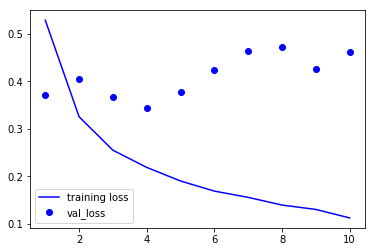

In [12]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']

x = range(1, 11)

plt.plot(x, training_loss, 'b', label='training loss')
plt.plot(x, val_loss, 'bo', label='val_loss')
plt.legend()

plt.show()

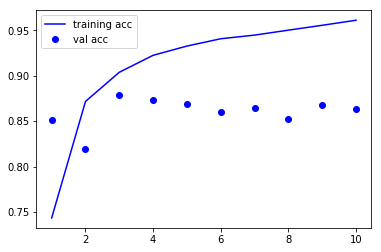

In [13]:
training_loss = history.history['acc']
val_loss = history.history['val_acc']

x = range(1, 11)

plt.plot(x, training_loss, 'b', label='training acc')
plt.plot(x, val_loss, 'bo', label='val acc')
plt.legend()

plt.show()


- 시간 순서로 처리한 것과 동일한 효과를 얻는다.

## 2. Bidirectional RNN

In [17]:
x_train.shape, y_train.shape

((25000, 500), (25000,))

- 양방향 RNN은 이 아이디어를 사용하여 시간 순서대로 처리하는 RNN 성능을 향상시킵니다. 입력 시퀀스를 양쪽 방향으로 바라보기때문에 드러나지 않은 다양한 표현을 얻어 시간 순선대로 처리할 떄 놓칠 수 있는 패턴을 잡아낸다.

In [18]:
model = Sequential()
# embedding을 하는 것은 10000차원을 32차원으로 줄이는 것이다.
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 287s 14ms/step - loss: 0.5697 - acc: 0.7046 - val_loss: 0.6672 - val_acc: 0.6714
Epoch 2/10
20000/20000 [==============================] - 287s 14ms/step - loss: 0.3641 - acc: 0.8550 - val_loss: 0.3551 - val_acc: 0.8500
Epoch 3/10
20000/20000 [==============================] - 292s 15ms/step - loss: 0.2816 - acc: 0.8931 - val_loss: 0.3294 - val_acc: 0.8624
Epoch 4/10
20000/20000 [==============================] - 292s 15ms/step - loss: 0.2320 - acc: 0.9163 - val_loss: 0.4785 - val_acc: 0.8528
Epoch 5/10
20000/20000 [==============================] - 291s 15ms/step - loss: 0.2060 - acc: 0.9274 - val_loss: 0.3162 - val_acc: 0.8824
Epoch 6/10
20000/20000 [==============================] - 286s 14ms/step - loss: 0.1854 - acc: 0.9349 - val_loss: 0.3529 - val_acc: 0.8828
Epoch 7/10
20000/20000 [==============================] - 286s 14ms/step - loss: 0.1734 - acc: 0.9403 - val_loss: 0.3

- Embedding Check

In [24]:
from keras.layers import Flatten

model = Sequential()
# embedding을 하는 것은 10000차원을 32차원으로 줄이는 것이다.
model.add(layers.Embedding(max_features, 32, input_length=maxlen))
model.add(Flatten())
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_5 (Flatten)          (None, 16000)             0         
Total params: 320,000
Trainable params: 320,000
Non-trainable params: 0
_________________________________________________________________


## 3. 정리

1. 4장에서 처음 배웠떤 것처럼 새로운 문제를 해결할 떄는 선택한 지표에서 상식 수준의 기준점을 설정하는 것이 좋다.

2. 계산 비용을 추가할지 판단하기 위해서 비용이 비싼 모델 전에 간단한 모델을 시도한다.

3. 시간 순서가 중요한 데이터가 있다면 순환 층이 적합합니다. 시계열 데이터를 펼쳐서 처리하는 모델의 성능을 쉽게 앞지른다.

4. 순환 네트워크에 드롭아웃을 사용하려면 타임스텝 동안 일정한 드롭아웃 마스크와 순환 드롭 아웃 마스크를 사용한다.

5. 스태킹 RNN은 단일 RNN 층보다 더 강력한 표현 능력을 제공하빈다. 하지만 계산 비용이 많이 들기 떄문에 항상 시도할 가치는 없습니다. 복잡한 문제에서는 확실히 도움이 되지만 작고 간단한 문제에서는 그렇지 않습니다.